In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
df = pd.read_csv('processed_data.csv')
df.describe()

,mp10,mp2.5,dirviento,tamb,so2,velviento,hrel,no2,o3,nox,no,co,region,Year,Month,Day,lat,long
count,151917.000000,144669.000000,151917.00000,110480.000000,143551.000000,151917.000000,146650.000000,139930.000000,135158.000000,134586.000000,139930.000000,127138.000000,151917.000000,151917.00000,151917.000000,151917.000000,151917.000000,151917.000000
mean,55.948889,26.408093,169.44795,11.559792,3.561906,1.350698,66.001324,16.660862,15.718465,39.228736,23.819789,0.800704,1.155802,2013.61082,6.516479,15.731603,-32.858720,-70.770443
std,34.322277,23.770587,90.16143,5.568606,5.927205,1.240569,24.100927,13.962965,15.962653,42.543168,38.457210,0.855293,0.659285,7.00665,3.443059,8.796537,4.702516,1.606828
min,0.000000,0.000000,0.00000,-40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1997.00000,1.000000,1.000000,-37.509146,-73.153204
25%,34.208300,12.750000,90.00000,8.752643,1.170000,0.486372,50.500000,6.478245,8.000000,11.896628,4.768615,0.295833,1.000000,2009.00000,4.000000,8.000000,-36.723690,-70.952996
50%,49.000000,19.333300,177.46900,11.716700,2.240280,1.006440,70.916400,12.646778,14.000000,23.512150,11.333300,0.530000,1.000000,2015.00000,7.000000,16.000000,-33.516667,-70.660702
75%,69.833300,32.208300,239.48100,14.709400,3.890000,1.854280,85.720000,23.416700,20.416700,52.415975,30.813895,0.983947,2.000000,2019.00000,10.000000,23.000000,-33.422261,-70.523256
max,917.940000,960.000000,360.00000,42.590000,406.845000,30.000000,105.000000,486.420000,500.496000,722.977000,2725.840000,22.210000,2.000000,2024.00000,12.000000,31.000000,-22.085846,-66.676393


In [151]:
df_Scaled=df.copy()

In [4]:
df_Scaled.describe()

,mp10,mp2.5,dirviento,tamb,so2,velviento,hrel,no2,o3,nox,no,co,region,Year,Month,Day,lat,long
count,151917.000000,144669.000000,151917.00000,110480.000000,143551.000000,151917.000000,146650.000000,139930.000000,135158.000000,134586.000000,139930.000000,127138.000000,151917.000000,151917.00000,151917.000000,151917.000000,151917.000000,151917.000000
mean,55.948889,26.408093,169.44795,11.559792,3.561906,1.350698,66.001324,16.660862,15.718465,39.228736,23.819789,0.800704,1.155802,2013.61082,6.516479,15.731603,-32.858720,-70.770443
std,34.322277,23.770587,90.16143,5.568606,5.927205,1.240569,24.100927,13.962965,15.962653,42.543168,38.457210,0.855293,0.659285,7.00665,3.443059,8.796537,4.702516,1.606828
min,0.000000,0.000000,0.00000,-40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1997.00000,1.000000,1.000000,-37.509146,-73.153204
25%,34.208300,12.750000,90.00000,8.752643,1.170000,0.486372,50.500000,6.478245,8.000000,11.896628,4.768615,0.295833,1.000000,2009.00000,4.000000,8.000000,-36.723690,-70.952996
50%,49.000000,19.333300,177.46900,11.716700,2.240280,1.006440,70.916400,12.646778,14.000000,23.512150,11.333300,0.530000,1.000000,2015.00000,7.000000,16.000000,-33.516667,-70.660702
75%,69.833300,32.208300,239.48100,14.709400,3.890000,1.854280,85.720000,23.416700,20.416700,52.415975,30.813895,0.983947,2.000000,2019.00000,10.000000,23.000000,-33.422261,-70.523256
max,917.940000,960.000000,360.00000,42.590000,406.845000,30.000000,105.000000,486.420000,500.496000,722.977000,2725.840000,22.210000,2.000000,2024.00000,12.000000,31.000000,-22.085846,-66.676393


In [152]:
# Crear un diccionario para almacenar los datos de cada locación
df_Scaled.fillna(value=0,inplace=True)
grouped_data = {location: location_df.sort_values(by='Date') for location, location_df in df_Scaled.groupby('station')}

In [6]:
grouped_data

{'El_bosque':             mp10    station    mp2.5  dirviento     tamb   so2  velviento  \
 0     178.542000  El_bosque  49.7829    221.195   0.0000  9.50   0.950428   
 1     178.542000  El_bosque  49.7829    221.195   0.0000  9.50   0.950428   
 2     178.542000  El_bosque  49.7829    221.195   0.0000  9.50   0.950428   
 3     178.542000  El_bosque  49.7829    221.195   0.0000  9.50   0.950428   
 4     146.042000  El_bosque  49.7829    221.195   0.0000  9.50   0.950428   
 ...          ...        ...      ...        ...      ...   ...        ...   
 9497   79.782609  El_bosque  26.0000    108.825  13.1833  1.92   0.686534   
 9498   80.000000  El_bosque  26.0000    112.848  14.4167  1.72   0.475424   
 9499  100.000000  El_bosque  39.0000    163.922  14.3000  1.72   0.337289   
 9500  100.000000  El_bosque  39.0000    188.595  14.3083  1.72   0.457751   
 9501  100.000000  El_bosque  39.0000    137.223  10.5333  1.72   0.168721   
 
          hrel      no2       o3      nox       n

### Predicción del siguiente día en base a la semana anterior

In [153]:
sequence_length = 7  # Longitud de la secuencia para el LSTM
X, y = [], []

for location, location_df in grouped_data.items():
    # Convertir el DataFrame a una matriz de NumPy, excluyendo 'Date', 'Location' y 'mp10' de X
    features = location_df.drop(['Date', 'station', 'mp10'], axis=1).values
    target = location_df['mp10'].values
    # Crear secuencias y etiquetas para cada locación
    for i in range(sequence_length, len(features)):
        X.append(tf.convert_to_tensor(features[i-sequence_length:i],dtype=tf.float32))  # Secuencia de entrada
        y.append(tf.convert_to_tensor(target[i],dtype=tf.float32))  # 'mp10' como objetivo

# Convertir listas a arrays de NumPy
X, y = np.array(X), np.array(y)


In [8]:
X.shape

(151714, 7, 17)

In [154]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar características de entrada
scaler_X = MinMaxScaler()
X_reshaped = X.reshape(-1, X.shape[-1])
X_normalized = scaler_X.fit_transform(X_reshaped)
X = X_normalized.reshape(X.shape)

# Si deseas normalizar `y`, usa otro escalador (opcional)
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

In [10]:
train_size = int(len(X) * 0.7)
validation_size=int(len(X) * 0.1)
X_train,X_val, X_test = X[:train_size],X[train_size:train_size+validation_size], X[train_size+validation_size:]
y_train,y_val, y_test = y[:train_size],y[train_size:train_size+validation_size], y[train_size+validation_size:]


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])


# Definir el modelo LSTM
model1 = Sequential()
model1.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(LSTM(units=50))
model1.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model1.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])
# Definir el modelo LSTM
model2 = Sequential()
model2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(LSTM(units=50))
model2.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model2.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])


C:\Users\benja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Métrica a monitorear
    patience=5,         # Número de épocas de paciencia
    restore_best_weights=True  # Restaurar los mejores pesos al final del entrenamiento
)


In [17]:
# Entrenar el modelo
history=model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping])
# Entrenar el modelo
history1=model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping])
# Entrenar el modelo
history2=model2.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping])

Epoch 1/50
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0201 - mean_absolute_percentage_error: 15380.8877 - mean_squared_error: 8.8032e-04 - val_loss: 0.0244 - val_mean_absolute_percentage_error: 33404.1680 - val_mean_squared_error: 0.0017
Epoch 2/50
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0177 - mean_absolute_percentage_error: 17516.0703 - mean_squared_error: 7.0183e-04 - val_loss: 0.0245 - val_mean_absolute_percentage_error: 27926.0000 - val_mean_squared_error: 0.0018
Epoch 3/50
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0168 - mean_absolute_percentage_error: 15141.1963 - mean_squared_error: 6.4092e-04 - val_loss: 0.0242 - val_mean_absolute_percentage_error: 29779.5020 - val_mean_squared_error: 0.0018
Epoch 4/50
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0163 - mean_absolute_percentage_error: 14439.5508 - mean_squared_error: 6.2784e-04 - val_loss: 0.0243 - val_mean_absolute_percentage_error: 26687.7949 - val_mean_squared_error: 0.0017
Epoc

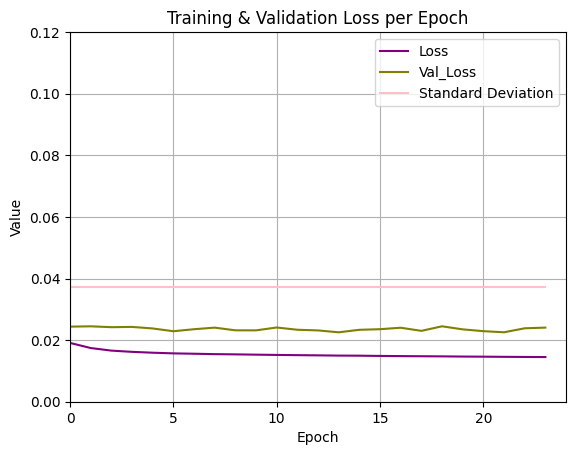

In [30]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history.history['loss'],  color='purple',label='Loss')
plt.plot(history.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.title('Training & Validation Loss per Epoch')
plt.xlim(0,len(history.history['loss']))

plt.legend()

plt.grid(True)
plt.savefig('val_loss_tabular.png',format='png')
# Muestra el gráfico
plt.show()

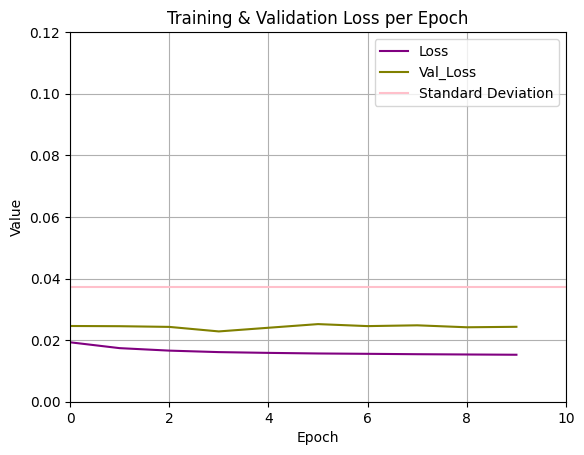

In [32]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history1.history['loss'],  color='purple',label='Loss')
plt.plot(history1.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.title('Training & Validation Loss per Epoch')
plt.xlim(0,len(history1.history['loss']))

plt.legend()

plt.grid(True)
plt.savefig('val_loss_tabular1.png',format='png')
# Muestra el gráfico
plt.show()

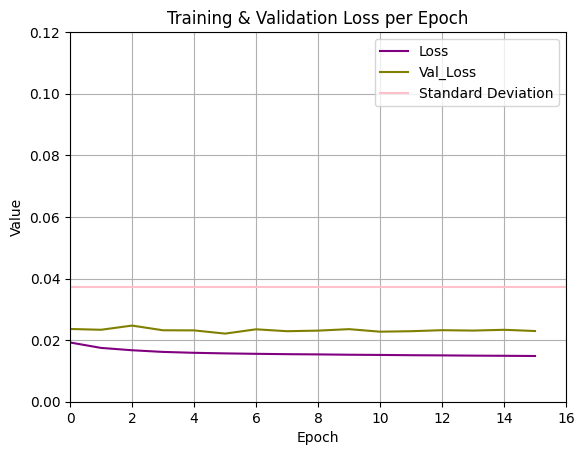

In [33]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history2.history['loss'],  color='purple',label='Loss')
plt.plot(history2.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.title('Training & Validation Loss per Epoch')
plt.xlim(0,len(history2.history['loss']))

plt.legend()

plt.grid(True)
plt.savefig('val_loss_tabular2.png',format='png')
# Muestra el gráfico
plt.show()

In [34]:
predictions=model.predict(X_test)
predictions1=model1.predict(X_test)
predictions2=model2.predict(X_test)

949/949 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
949/949 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
949/949 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [39]:
def smape_f(y_true, y_pred):
    """
    Calcula el Symmetric Mean Absolute Percentage Error.
    """
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-6))

In [40]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Calcular MAE
mae = mean_absolute_error(y_test, predictions)
mse= mean_squared_error(y_test, predictions)
# Calcular R-squared
r2 = r2_score(y_test, predictions)


smape = smape_f(y_test, predictions)

# Imprimir las métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"SMAPE: {smape}%")

MAE: 0.019236663356423378
MSE: 0.000796502223238349
R-squared: 0.37647008895874023
SMAPE: 30.302098393440247%


In [41]:
# Calcular MAE
mae1 = mean_absolute_error(y_test, predictions1)
mse1= mean_squared_error(y_test, predictions1)
# Calcular R-squared
r21 = r2_score(y_test, predictions1)


smape1 = smape_f(y_test, predictions1)

# Imprimir las métricas
print(f"MAE: {mae1}")
print(f"MSE: {mse1}")
print(f"R-squared: {r21}")
print(f"SMAPE: {smape1}%")

MAE: 0.019899798557162285
MSE: 0.000849888427183032
R-squared: 0.33467745780944824
SMAPE: 31.938794255256653%


In [44]:
# Calcular MAE
mae2= mean_absolute_error(y_test, predictions2)
mse2= mean_squared_error(y_test, predictions2)
# Calcular R-squared
r22 = r2_score(y_test, predictions2)


smape2 = smape_f(y_test, predictions2)

# Imprimir las métricas
print(f"MAE: {mae2}")
print(f"MSE: {mse2}")
print(f"R-squared: {r22}")
print(f"SMAPE: {smape2}%")

MAE: 0.018991032615303993
MSE: 0.0007619973621331155
R-squared: 0.40348172187805176
SMAPE: 30.279064178466797%


In [70]:
mae0=np.array([0.019236663356423378,0.019899798557162285,0.018991032615303993]).mean()
mse0=np.array([0.000796502223238349,0.000849888427183032,0.0007619973621331155]).mean()
r20=np.array([0.37647008895874023,0.33467745780944824,0.40348172187805176]).mean()
smape0=np.array([30.302098393440247,31.938794255256653,30.279064178466797]).mean()

In [58]:
mae_std_0=np.array([0.019236663356423378,0.019899798557162285,0.018991032615303993]).std()
mse_std_0=np.array([0.000796502223238349,0.000849888427183032,0.0007619973621331155]).std()
r2_std_0=np.array([0.37647008895874023,0.33467745780944824,0.40348172187805176]).std()
smape_std_0=np.array([30.302098393440247,31.938794255256653,30.279064178466797]).std()

### Predicción del promedio de la siguiente semana en base a la semana anterior

In [46]:
df_Scaled=df.copy()
df_Scaled.fillna(value=0,inplace=True)
grouped_data = {location: location_df.sort_values(by='Date') for location, location_df in df_Scaled.groupby('station')}
sequence_length = 7  # Número de días anteriores a usar
prediction_length = 7  # Número de días a predecir (para el promedio)
X, y = [], []

for location, location_df in grouped_data.items():
    features = location_df.drop(['Date', 'station', 'mp10'], axis=1).values
    target = location_df['mp10'].values
    
    for i in range(sequence_length, len(features) - prediction_length + 1):
        # Crear secuencia de entrada de `sequence_length` días
        X.append(tf.convert_to_tensor(features[i-sequence_length:i],dtype=tf.float32))
        
        # Calcular el promedio de `mp10` para los próximos 7 días
        y.append(tf.convert_to_tensor(np.mean(target[i:i+prediction_length]),dtype=tf.float32))

# Convertir a arrays de numpy
X, y = np.array(X), np.array(y)

print(f"Forma de X: {X.shape}, Forma de y: {y.shape}")


Forma de X: (151540, 7, 17), Forma de y: (151540,)


In [47]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar características de entrada
scaler_X = MinMaxScaler()
X_reshaped = X.reshape(-1, X.shape[-1])
X_normalized = scaler_X.fit_transform(X_reshaped)
X = X_normalized.reshape(X.shape)

# Si deseas normalizar `y`, usa otro escalador (opcional)
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

In [48]:
# Dividir en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
train_size = int(len(X) * 0.7)
validation_size=int(len(X) * 0.1)
X_train,X_val, X_test = X[:train_size],X[train_size:train_size+validation_size], X[train_size+validation_size:]
y_train,y_val, y_test = y[:train_size],y[train_size:train_size+validation_size], y[train_size+validation_size:]


In [49]:

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])

# Definir el modelo LSTM
model1 = Sequential()
model1.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(LSTM(units=50))
model1.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model1.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])


# Definir el modelo LSTM
model2 = Sequential()
model2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(LSTM(units=50))
model2.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model2.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])

# Configurar Early Stopping
early_stopping1 = EarlyStopping(
    monitor='val_loss',  # Métrica a monitorear
    patience=5,         # Número de épocas de paciencia
    restore_best_weights=True  # Restaurar los mejores pesos al final del entrenamiento
)


C:\Users\benja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
# Entrenar el modelo
history=model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping1])
history1=model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping1])
history2=model2.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping1])

Epoch 1/50
6630/6630 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.0189 - mean_absolute_percentage_error: 34.2749 - mean_squared_error: 7.2863e-04 - val_loss: 0.0240 - val_mean_absolute_percentage_error: 43.2631 - val_mean_squared_error: 0.0017
Epoch 2/50
6630/6630 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0159 - mean_absolute_percentage_error: 28.4697 - mean_squared_error: 5.3243e-04 - val_loss: 0.0237 - val_mean_absolute_percentage_error: 40.6913 - val_mean_squared_error: 0.0017
Epoch 3/50
6630/6630 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0147 - mean_absolute_percentage_error: 25.7341 - mean_squared_error: 4.7044e-04 - val_loss: 0.0226 - val_mean_absolute_percentage_error: 44.1857 - val_mean_squared_error: 0.0016
Epoch 4/50
6630/6630 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0142 - mean_absolute_percentage_error: 24.3431 - mean_squared_error: 4.4071e-04 - val_loss: 0.0235 - val_mean_absolute_percentage_error: 45.4817 - val_mean_squared_error: 0.0016
Epoch 5/50
6630/6630 ━━━━━━━

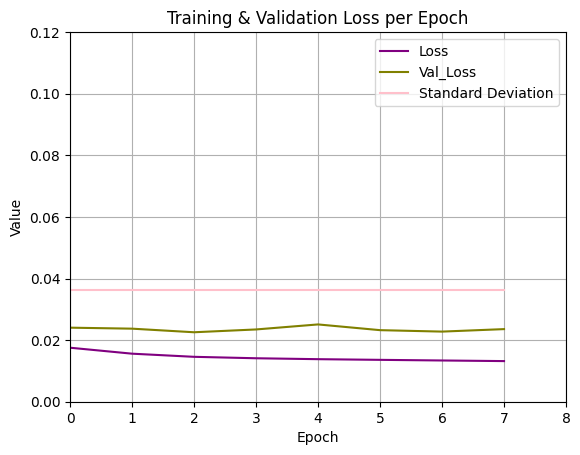

In [51]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history.history['loss'],  color='purple',label='Loss')
plt.plot(history.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.xlim(0,len(history.history['loss']))

plt.title('Training & Validation Loss per Epoch')
plt.legend()

plt.grid(True)
plt.savefig('val_loss_77_0.png',format='png')
# Muestra el gráfico
plt.show()

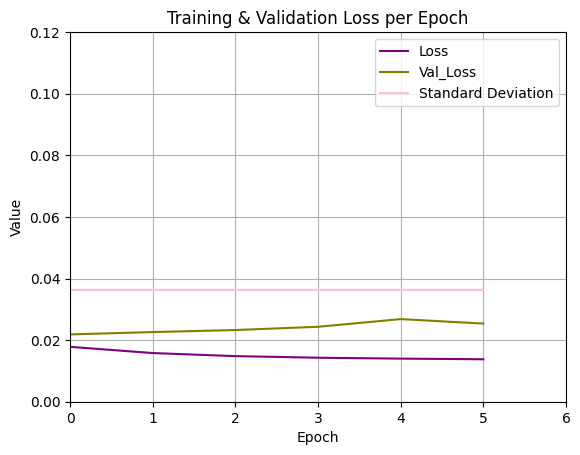

In [52]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history1.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history1.history['loss'],  color='purple',label='Loss')
plt.plot(history1.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.xlim(0,len(history1.history['loss']))

plt.title('Training & Validation Loss per Epoch')
plt.legend()

plt.grid(True)
plt.savefig('val_loss_77_1.png',format='png')
# Muestra el gráfico
plt.show()

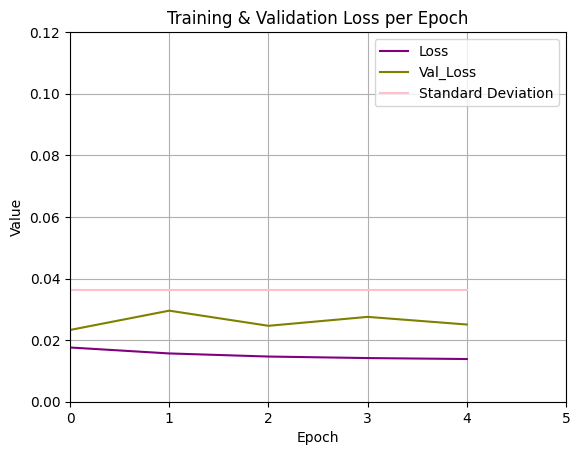

In [53]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history2.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history2.history['loss'],  color='purple',label='Loss')
plt.plot(history2.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.xlim(0,len(history2.history['loss']))

plt.title('Training & Validation Loss per Epoch')
plt.legend()

plt.grid(True)
plt.savefig('val_loss_77_2.png',format='png')
# Muestra el gráfico
plt.show()

In [54]:
predictions=model.predict(X_test)
predictions1=model1.predict(X_test)
predictions2=model2.predict(X_test)

948/948 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
948/948 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
948/948 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [55]:
# Calcular MAE
mae_0 = mean_absolute_error(y_test, predictions)
mse_0= mean_squared_error(y_test, predictions)
# Calcular R-squared
r2_0 = r2_score(y_test, predictions)

smape_0 = smape_f(y_test, predictions)

# Imprimir las métricas
print(f"MAE: {mae_0}")
print(f"MSE: {mse_0}")
print(f"R-squared: {r2_0}")
print(f"SMAPE: {smape_0}%")
#-----------------------------
# Calcular MAE
mae_1 = mean_absolute_error(y_test, predictions1)
mse_1= mean_squared_error(y_test, predictions1)
# Calcular R-squared
r2_1 = r2_score(y_test, predictions1)

smape_1 = smape_f(y_test, predictions1)

# Imprimir las métricas
print(f"MAE: {mae_1}")
print(f"MSE: {mse_1}")
print(f"R-squared: {r2_1}")
print(f"SMAPE: {smape_1}%")
#-----------------------------
# Calcular MAE
mae_2 = mean_absolute_error(y_test, predictions2)
mse_2= mean_squared_error(y_test, predictions2)
# Calcular R-squared
r2_2 = r2_score(y_test, predictions2)

smape_2 = smape_f(y_test, predictions2)

# Imprimir las métricas
print(f"MAE: {mae_2}")
print(f"MSE: {mse_2}")
print(f"R-squared: {r2_2}")
print(f"SMAPE: {smape_2}%")

MAE: 0.018383482471108437
MSE: 0.000663355749566108
R-squared: 0.40683066844940186
SMAPE: 24.37872737646103%
MAE: 0.018268881365656853
MSE: 0.0006476949783973396
R-squared: 0.420834481716156
SMAPE: 24.147827923297882%
MAE: 0.01862793043255806
MSE: 0.0006615663878619671
R-squared: 0.40843069553375244
SMAPE: 24.77533668279648%


In [71]:
mae1=np.mean([mae_0,mae_1,mae_2])
mse1=np.mean([mse_0,mse_1,mse_2])
r21=np.mean([r2_0,r2_1,r2_2])
smape1=np.mean([smape_0,smape_1,smape_2])
mae_std_1=np.std([mae_0,mae_1,mae_2])
mse_std_1=np.std([mse_0,mse_1,mse_2])
r2_std_1=np.std([r2_0,r2_1,r2_2])
smape_std_1=np.std([smape_0,smape_1,smape_2])

### Predicción usando 10 días previos para el día siguiente

In [59]:
sequence_length = 10  # Longitud de la secuencia para el LSTM
X, y = [], []

for location, location_df in grouped_data.items():
    # Convertir el DataFrame a una matriz de NumPy, excluyendo 'Date', 'Location' y 'mp10' de X
    features = location_df.drop(['Date', 'station', 'mp10'], axis=1).values
    target = location_df['mp10'].values
    # Crear secuencias y etiquetas para cada locación
    for i in range(sequence_length, len(features)):
        X.append(tf.convert_to_tensor(features[i-sequence_length:i],dtype=tf.float32))  # Secuencia de entrada
        y.append(tf.convert_to_tensor(target[i],dtype=tf.float32))  # 'mp10' como objetivo

# Convertir listas a arrays de NumPy
X, y = np.array(X), np.array(y)


In [60]:
# Normalizar características de entrada
scaler_X = MinMaxScaler()
X_reshaped = X.reshape(-1, X.shape[-1])
X_normalized = scaler_X.fit_transform(X_reshaped)
X = X_normalized.reshape(X.shape)

# Si deseas normalizar `y`, usa otro escalador (opcional)
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

In [61]:
train_size = int(len(X) * 0.7)
validation_size=int(len(X) * 0.1)
X_train,X_val, X_test = X[:train_size],X[train_size:train_size+validation_size], X[train_size+validation_size:]
y_train,y_val, y_test = y[:train_size],y[train_size:train_size+validation_size], y[train_size+validation_size:]


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])


# Definir el modelo LSTM
model1 = Sequential()
model1.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(LSTM(units=50))
model1.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model1.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])
# Definir el modelo LSTM
model2 = Sequential()
model2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(LSTM(units=50))
model2.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model2.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])


C:\Users\benja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Métrica a monitorear
    patience=5,         # Número de épocas de paciencia
    restore_best_weights=True  # Restaurar los mejores pesos al final del entrenamiento
)

In [65]:
# Entrenar el modelo
history=model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping])
# Entrenar el modelo
history1=model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping])
# Entrenar el modelo
history2=model2.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping])

Epoch 1/50
6634/6634 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.0181 - mean_absolute_percentage_error: 18005.6914 - mean_squared_error: 7.2382e-04 - val_loss: 0.0266 - val_mean_absolute_percentage_error: 21324.9277 - val_mean_squared_error: 0.0020
Epoch 2/50
6634/6634 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0172 - mean_absolute_percentage_error: 15387.5693 - mean_squared_error: 6.7933e-04 - val_loss: 0.0264 - val_mean_absolute_percentage_error: 21145.1484 - val_mean_squared_error: 0.0020
Epoch 3/50
6634/6634 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.0164 - mean_absolute_percentage_error: 13036.5293 - mean_squared_error: 6.4251e-04 - val_loss: 0.0243 - val_mean_absolute_percentage_error: 29925.5195 - val_mean_squared_error: 0.0017
Epoch 4/50
6634/6634 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0161 - mean_absolute_percentage_error: 15041.8916 - mean_squared_error: 6.0092e-04 - val_loss: 0.0234 - val_mean_absolute_percentage_error: 25156.5605 - val_mean_squared_error: 0.0017
Epoc

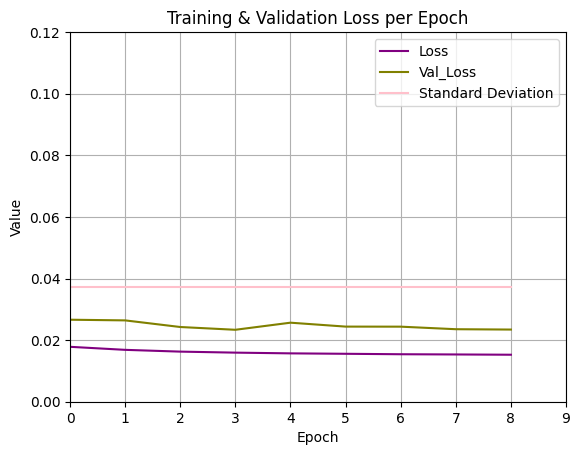

In [66]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history.history['loss'],  color='purple',label='Loss')
plt.plot(history.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.title('Training & Validation Loss per Epoch')
plt.xlim(0,len(history.history['loss']))

plt.legend()

plt.grid(True)
plt.savefig('val_loss_tabular_101_0.png',format='png')
# Muestra el gráfico
plt.show()

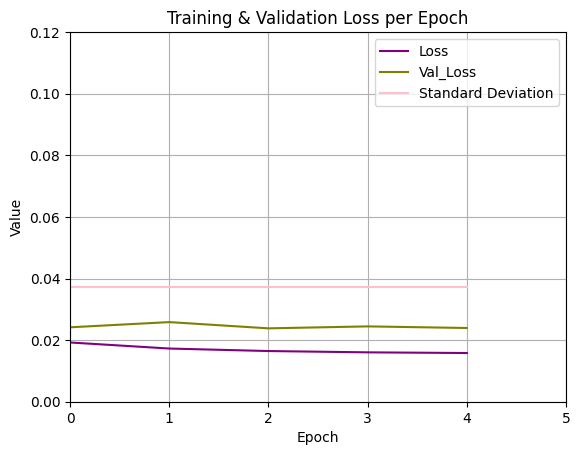

In [67]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history1.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history1.history['loss'],  color='purple',label='Loss')
plt.plot(history1.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.title('Training & Validation Loss per Epoch')
plt.xlim(0,len(history1.history['loss']))

plt.legend()

plt.grid(True)
plt.savefig('val_loss_tabular_101_1.png',format='png')
# Muestra el gráfico
plt.show()

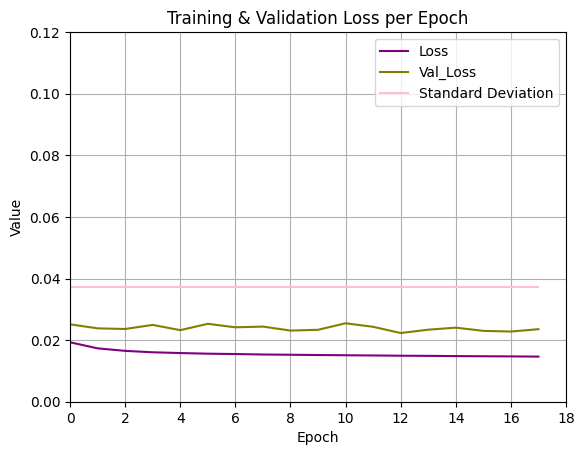

In [68]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history2.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history2.history['loss'],  color='purple',label='Loss')
plt.plot(history2.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.title('Training & Validation Loss per Epoch')
plt.xlim(0,len(history2.history['loss']))

plt.legend()

plt.grid(True)
plt.savefig('val_loss_tabular_101_2.png',format='png')
# Muestra el gráfico
plt.show()

In [72]:
predictions=model.predict(X_test)
predictions1=model1.predict(X_test)
predictions2=model2.predict(X_test)

948/948 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
948/948 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
948/948 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [73]:
# Calcular MAE
mae = mean_absolute_error(y_test, predictions)
mse= mean_squared_error(y_test, predictions)
# Calcular R-squared
r2 = r2_score(y_test, predictions)


smape = smape_f(y_test, predictions)

# Imprimir las métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"SMAPE: {smape}%")

MAE: 0.01850261352956295
MSE: 0.0007305255276151001
R-squared: 0.42782384157180786
SMAPE: 29.557684063911438%


In [74]:
# Calcular MAE
mae_1 = mean_absolute_error(y_test, predictions1)
mse_1= mean_squared_error(y_test, predictions1)
# Calcular R-squared
r2_1 = r2_score(y_test, predictions1)


smape_1 = smape_f(y_test, predictions1)

# Imprimir las métricas
print(f"MAE: {mae_1}")
print(f"MSE: {mse_1}")
print(f"R-squared: {r2_1}")
print(f"SMAPE: {smape_1}%")

MAE: 0.019807951524853706
MSE: 0.000853567908052355
R-squared: 0.33145225048065186
SMAPE: 31.664273142814636%


In [75]:
# Calcular MAE
mae_2= mean_absolute_error(y_test, predictions2)
mse_2= mean_squared_error(y_test, predictions2)
# Calcular R-squared
r2_2 = r2_score(y_test, predictions2)


smape_2 = smape_f(y_test, predictions2)

# Imprimir las métricas
print(f"MAE: {mae_2}")
print(f"MSE: {mse_2}")
print(f"R-squared: {r2_2}")
print(f"SMAPE: {smape_2}%")

MAE: 0.018450364470481873
MSE: 0.000758157460950315
R-squared: 0.4061814546585083
SMAPE: 29.53430712223053%


In [76]:
mae2=np.mean([mae,mae1,mae2])
mae_std_2=np.std([mae,mae1,mae2])
mse2=np.mean([mse,mse1,mse2])
mse_std_2=np.std([mse,mse1,mse2])
r22=np.mean([r2,r21,r22])
r2_std_2=np.mean([r2,r21,r22])
smape2=np.mean([smape,smape1,smape2])
smape_std_2=np.mean([smape,smape1,smape2])

### Predicción usando 10 días previos para la semana siguiente

In [77]:
df_Scaled=df.copy()
df_Scaled.fillna(value=0,inplace=True)
grouped_data = {location: location_df.sort_values(by='Date') for location, location_df in df_Scaled.groupby('station')}
sequence_length = 10  # Número de días anteriores a usar
prediction_length = 7  # Número de días a predecir (para el promedio)
X, y = [], []

for location, location_df in grouped_data.items():
    features = location_df.drop(['Date', 'station', 'mp10'], axis=1).values
    target = location_df['mp10'].values
    
    for i in range(sequence_length, len(features) - prediction_length + 1):
        # Crear secuencia de entrada de `sequence_length` días
        X.append(tf.convert_to_tensor(features[i-sequence_length:i],dtype=tf.float32))
        
        # Calcular el promedio de `mp10` para los próximos 7 días
        y.append(tf.convert_to_tensor(np.mean(target[i:i+prediction_length]),dtype=tf.float32))

# Convertir a arrays de numpy
X, y = np.array(X), np.array(y)

print(f"Forma de X: {X.shape}, Forma de y: {y.shape}")


Forma de X: (151453, 10, 17), Forma de y: (151453,)


In [78]:
# Normalizar características de entrada
scaler_X = MinMaxScaler()
X_reshaped = X.reshape(-1, X.shape[-1])
X_normalized = scaler_X.fit_transform(X_reshaped)
X = X_normalized.reshape(X.shape)

# Si deseas normalizar `y`, usa otro escalador (opcional)
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

In [79]:
# Dividir en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
train_size = int(len(X) * 0.7)
validation_size=int(len(X) * 0.1)
X_train,X_val, X_test = X[:train_size],X[train_size:train_size+validation_size], X[train_size+validation_size:]
y_train,y_val, y_test = y[:train_size],y[train_size:train_size+validation_size], y[train_size+validation_size:]


In [80]:

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])

# Definir el modelo LSTM
model1 = Sequential()
model1.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(LSTM(units=50))
model1.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model1.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])


# Definir el modelo LSTM
model2 = Sequential()
model2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(LSTM(units=50))
model2.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model2.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])

# Configurar Early Stopping
early_stopping1 = EarlyStopping(
    monitor='val_loss',  # Métrica a monitorear
    patience=5,         # Número de épocas de paciencia
    restore_best_weights=True  # Restaurar los mejores pesos al final del entrenamiento
)


C:\Users\benja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [82]:
# Entrenar el modelo
history=model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping1])
history1=model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping1])
history2=model2.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping1])

Epoch 1/50
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.0166 - mean_absolute_percentage_error: 29.9463 - mean_squared_error: 5.7122e-04 - val_loss: 0.0225 - val_mean_absolute_percentage_error: 44.9782 - val_mean_squared_error: 0.0015
Epoch 2/50
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0151 - mean_absolute_percentage_error: 26.3963 - mean_squared_error: 4.9027e-04 - val_loss: 0.0270 - val_mean_absolute_percentage_error: 45.7541 - val_mean_squared_error: 0.0019
Epoch 3/50
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0143 - mean_absolute_percentage_error: 24.5283 - mean_squared_error: 4.4828e-04 - val_loss: 0.0251 - val_mean_absolute_percentage_error: 43.7696 - val_mean_squared_error: 0.0018
Epoch 4/50
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0139 - mean_absolute_percentage_error: 23.5716 - mean_squared_error: 4.2072e-04 - val_loss: 0.0275 - val_mean_absolute_percentage_error: 43.4030 - val_mean_squared_error: 0.0020
Epoch 5/50
6627/6627 ━━━━━━━

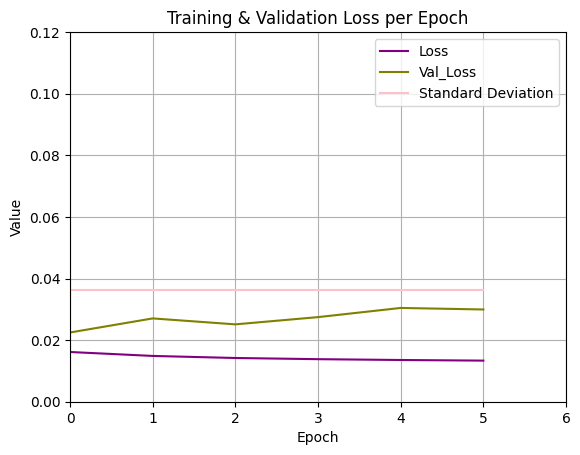

In [83]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history.history['loss'],  color='purple',label='Loss')
plt.plot(history.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.xlim(0,len(history.history['loss']))

plt.title('Training & Validation Loss per Epoch')
plt.legend()

plt.grid(True)
plt.savefig('val_loss_107_0.png',format='png')
# Muestra el gráfico
plt.show()

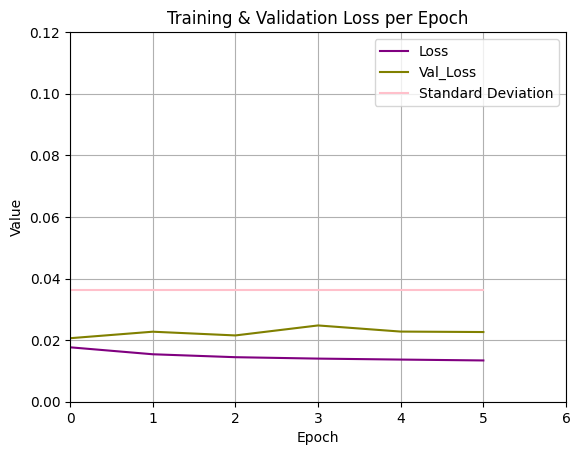

In [84]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history1.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history1.history['loss'],  color='purple',label='Loss')
plt.plot(history1.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.xlim(0,len(history1.history['loss']))

plt.title('Training & Validation Loss per Epoch')
plt.legend()

plt.grid(True)
plt.savefig('val_loss_107_1.png',format='png')
# Muestra el gráfico
plt.show()

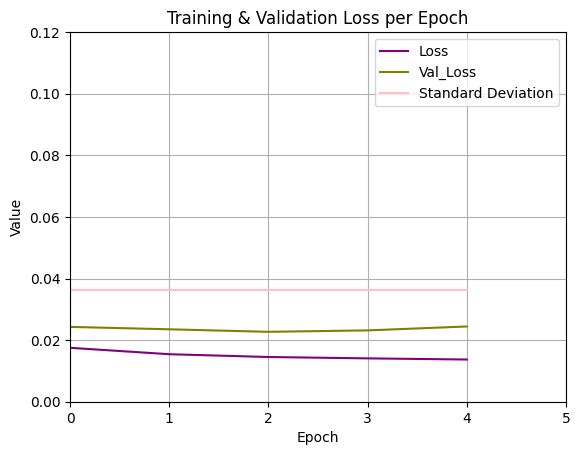

In [85]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history2.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history2.history['loss'],  color='purple',label='Loss')
plt.plot(history2.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.xlim(0,len(history2.history['loss']))

plt.title('Training & Validation Loss per Epoch')
plt.legend()

plt.grid(True)
plt.savefig('val_loss_107_2.png',format='png')
# Muestra el gráfico
plt.show()

In [87]:
predictions=model.predict(X_test)
predictions1=model1.predict(X_test)
predictions2=model2.predict(X_test)

947/947 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
947/947 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
947/947 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [88]:
# Calcular MAE
mae_0 = mean_absolute_error(y_test, predictions)
mse_0= mean_squared_error(y_test, predictions)
# Calcular R-squared
r2_0 = r2_score(y_test, predictions)

smape_0 = smape_f(y_test, predictions)

# Imprimir las métricas
print(f"MAE: {mae_0}")
print(f"MSE: {mse_0}")
print(f"R-squared: {r2_0}")
print(f"SMAPE: {smape_0}%")
#-----------------------------
# Calcular MAE
mae_1 = mean_absolute_error(y_test, predictions1)
mse_1= mean_squared_error(y_test, predictions1)
# Calcular R-squared
r2_1 = r2_score(y_test, predictions1)

smape_1 = smape_f(y_test, predictions1)

# Imprimir las métricas
print(f"MAE: {mae_1}")
print(f"MSE: {mse_1}")
print(f"R-squared: {r2_1}")
print(f"SMAPE: {smape_1}%")
#-----------------------------
# Calcular MAE
mae_2 = mean_absolute_error(y_test, predictions2)
mse_2= mean_squared_error(y_test, predictions2)
# Calcular R-squared
r2_2 = r2_score(y_test, predictions2)

smape_2 = smape_f(y_test, predictions2)

# Imprimir las métricas
print(f"MAE: {mae_2}")
print(f"MSE: {mse_2}")
print(f"R-squared: {r2_2}")
print(f"SMAPE: {smape_2}%")

MAE: 0.018687047064304352
MSE: 0.0006529400125145912
R-squared: 0.4161841869354248
SMAPE: 24.74202960729599%
MAE: 0.018935684114694595
MSE: 0.0007058636983856559
R-squared: 0.3688633441925049
SMAPE: 25.12332797050476%
MAE: 0.019170161336660385
MSE: 0.0007047764956951141
R-squared: 0.36983543634414673
SMAPE: 25.37737488746643%


In [90]:
mae3=np.mean([mae_0,mae_1,mae_2])
mse3=np.mean([mse_0,mse_1,mse_2])
r23=np.mean([r2_0,r2_1,r2_2])
smape3=np.mean([smape_0,smape_1,smape_2])
mae_std_3=np.std([mae_0,mae_1,mae_2])
mse_std_3=np.std([mse_0,mse_1,mse_2])
r2_std_3=np.std([r2_0,r2_1,r2_2])
smape_std_3=np.std([smape_0,smape_1,smape_2])

## Capping

In [155]:
# Calcular la media y la desviación estándar
mean = df['mp10'].mean()
std = df['mp10'].std()

# Definir límites usando múltiplos de la desviación estándar (ej. 3 desviaciones estándar)
lower_cap = mean - 3 * std  # Límite inferior: media - 3 veces la desviación estándar
upper_cap = mean + 3 * std  # Límite superior: media + 3 veces la desviación estándar

# Aplicar el capping
df['mp10'] = df['mp10'].clip(lower=lower_cap, upper=upper_cap)
df_Scaled=df.copy()
# Crear un diccionario para almacenar los datos de cada locación
df_Scaled.fillna(value=0,inplace=True)
grouped_data = {location: location_df.sort_values(by='Date') for location, location_df in df_Scaled.groupby('station')}

### Predicción del siguiente día en base a la semana anterior

In [156]:
sequence_length = 7  # Longitud de la secuencia para el LSTM
X, y = [], []

for location, location_df in grouped_data.items():
    # Convertir el DataFrame a una matriz de NumPy, excluyendo 'Date', 'Location' y 'mp10' de X
    features = location_df.drop(['Date', 'station', 'mp10'], axis=1).values
    target = location_df['mp10'].values
    # Crear secuencias y etiquetas para cada locación
    for i in range(sequence_length, len(features)):
        X.append(tf.convert_to_tensor(features[i-sequence_length:i],dtype=tf.float32))  # Secuencia de entrada
        y.append(tf.convert_to_tensor(target[i],dtype=tf.float32))  # 'mp10' como objetivo

# Convertir listas a arrays de NumPy
X, y = np.array(X), np.array(y)


In [157]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar características de entrada
scaler_X = MinMaxScaler()
X_reshaped = X.reshape(-1, X.shape[-1])
X_normalized = scaler_X.fit_transform(X_reshaped)
X = X_normalized.reshape(X.shape)

# Si deseas normalizar `y`, usa otro escalador (opcional)
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

In [100]:
train_size = int(len(X) * 0.7)
validation_size=int(len(X) * 0.1)
X_train,X_val, X_test = X[:train_size],X[train_size:train_size+validation_size], X[train_size+validation_size:]
y_train,y_val, y_test = y[:train_size],y[train_size:train_size+validation_size], y[train_size+validation_size:]


In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])


# Definir el modelo LSTM
model1 = Sequential()
model1.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(LSTM(units=50))
model1.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model1.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])
# Definir el modelo LSTM
model2 = Sequential()
model2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(LSTM(units=50))
model2.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model2.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])


C:\Users\benja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [102]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Métrica a monitorear
    patience=5,         # Número de épocas de paciencia
    restore_best_weights=True  # Restaurar los mejores pesos al final del entrenamiento
)


In [103]:
# Entrenar el modelo
history=model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping])
# Entrenar el modelo
history1=model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping])
# Entrenar el modelo
history2=model2.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping])

Epoch 1/50
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.1152 - mean_absolute_percentage_error: 87814.2109 - mean_squared_error: 0.0263 - val_loss: 0.1433 - val_mean_absolute_percentage_error: 177882.6875 - val_mean_squared_error: 0.0390
Epoch 2/50
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.0965 - mean_absolute_percentage_error: 90045.5781 - mean_squared_error: 0.0189 - val_loss: 0.1424 - val_mean_absolute_percentage_error: 156289.1406 - val_mean_squared_error: 0.0379
Epoch 3/50
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.0915 - mean_absolute_percentage_error: 54268.0117 - mean_squared_error: 0.0173 - val_loss: 0.1416 - val_mean_absolute_percentage_error: 140439.3125 - val_mean_squared_error: 0.0381
Epoch 4/50
6638/6638 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.0896 - mean_absolute_percentage_error: 59596.0391 - mean_squared_error: 0.0170 - val_loss: 0.1382 - val_mean_absolute_percentage_error: 146509.6250 - val_mean_squared_error: 0.0367
Epoch 5/50
6638/

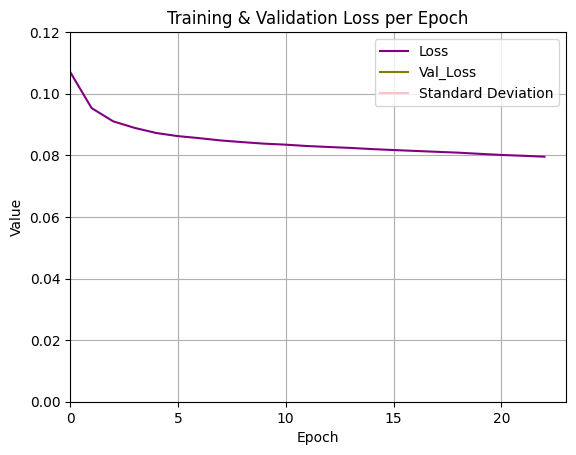

In [104]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history.history['loss'],  color='purple',label='Loss')
plt.plot(history.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.title('Training & Validation Loss per Epoch')
plt.xlim(0,len(history.history['loss']))

plt.legend()

plt.grid(True)
plt.savefig('val_loss_capping_71_0.png',format='png')
# Muestra el gráfico
plt.show()

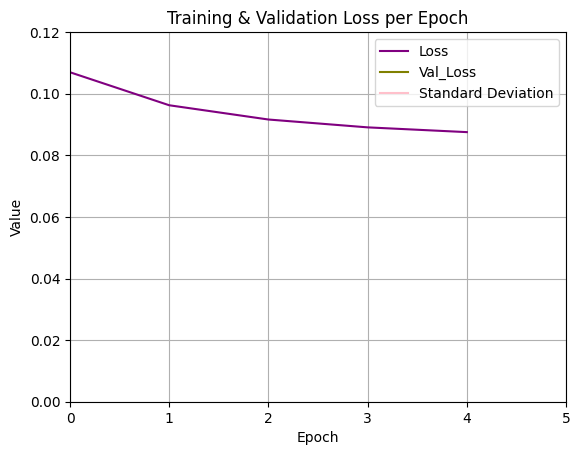

In [105]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history1.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history1.history['loss'],  color='purple',label='Loss')
plt.plot(history1.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.title('Training & Validation Loss per Epoch')
plt.xlim(0,len(history1.history['loss']))

plt.legend()

plt.grid(True)
plt.savefig('val_loss_capping_71_1.png',format='png')
# Muestra el gráfico
plt.show()

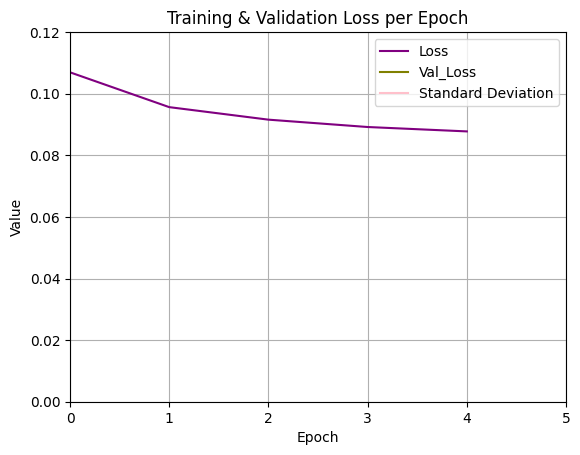

In [106]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history2.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history2.history['loss'],  color='purple',label='Loss')
plt.plot(history2.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.title('Training & Validation Loss per Epoch')
plt.xlim(0,len(history2.history['loss']))

plt.legend()

plt.grid(True)
plt.savefig('val_loss_capping_71_2.png',format='png')
# Muestra el gráfico
plt.show()

In [107]:
predictions=model.predict(X_test)
predictions1=model1.predict(X_test)
predictions2=model2.predict(X_test)

949/949 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
949/949 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
949/949 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [108]:
# Calcular MAE
mae = mean_absolute_error(y_test, predictions)
mse= mean_squared_error(y_test, predictions)
# Calcular R-squared
r2 = r2_score(y_test, predictions)


smape = smape_f(y_test, predictions)

# Imprimir las métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"SMAPE: {smape}%")

MAE: 0.10493502765893936
MSE: 0.019445056095719337
R-squared: 0.4423906207084656
SMAPE: 29.979729652404785%


In [109]:
# Calcular MAE
mae_1 = mean_absolute_error(y_test, predictions1)
mse_1= mean_squared_error(y_test, predictions1)
# Calcular R-squared
r2_1 = r2_score(y_test, predictions1)


smape_1 = smape_f(y_test, predictions1)

# Imprimir las métricas
print(f"MAE: {mae_1}")
print(f"MSE: {mse_1}")
print(f"R-squared: {r2_1}")
print(f"SMAPE: {smape_1}%")

MAE: 0.111953504383564
MSE: 0.021980425342917442
R-squared: 0.3696860074996948
SMAPE: 31.588470935821533%


In [110]:
# Calcular MAE
mae_2= mean_absolute_error(y_test, predictions2)
mse_2= mean_squared_error(y_test, predictions2)
# Calcular R-squared
r2_2 = r2_score(y_test, predictions2)


smape_2 = smape_f(y_test, predictions2)

# Imprimir las métricas
print(f"MAE: {mae_2}")
print(f"MSE: {mse_2}")
print(f"R-squared: {r2_2}")
print(f"SMAPE: {smape_2}%")

MAE: 0.1088033989071846
MSE: 0.021236594766378403
R-squared: 0.3910161256790161
SMAPE: 30.877789855003357%


In [111]:
mae4=np.mean([mae,mae_1,mae_2])
mse4=np.mean([mse,mse_1,mse_2])
r24=np.mean([r2,r2_1,r2_2])
smape4=np.mean([smape,smape_1,smape_2])
mae_std_4=np.std([mae,mae_1,mae_2])
mse_std_4=np.std([mse,mse_1,mse_2])
r2_std_4=np.std([r2,r2_1,r2_2])
smape_std_4=np.std([smape,smape_1,smape_2])

### Predicción del promedio de la siguiente semana en base a la semana anterior

In [112]:
df_Scaled=df.copy()
df_Scaled.fillna(value=0,inplace=True)
grouped_data = {location: location_df.sort_values(by='Date') for location, location_df in df_Scaled.groupby('station')}
sequence_length = 7  # Número de días anteriores a usar
prediction_length = 7  # Número de días a predecir (para el promedio)
X, y = [], []

for location, location_df in grouped_data.items():
    features = location_df.drop(['Date', 'station', 'mp10'], axis=1).values
    target = location_df['mp10'].values
    
    for i in range(sequence_length, len(features) - prediction_length + 1):
        # Crear secuencia de entrada de `sequence_length` días
        X.append(tf.convert_to_tensor(features[i-sequence_length:i],dtype=tf.float32))
        
        # Calcular el promedio de `mp10` para los próximos 7 días
        y.append(tf.convert_to_tensor(np.mean(target[i:i+prediction_length]),dtype=tf.float32))

# Convertir a arrays de numpy
X, y = np.array(X), np.array(y)

print(f"Forma de X: {X.shape}, Forma de y: {y.shape}")


Forma de X: (151540, 7, 17), Forma de y: (151540,)


In [113]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar características de entrada
scaler_X = MinMaxScaler()
X_reshaped = X.reshape(-1, X.shape[-1])
X_normalized = scaler_X.fit_transform(X_reshaped)
X = X_normalized.reshape(X.shape)

# Si deseas normalizar `y`, usa otro escalador (opcional)
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

In [114]:
# Dividir en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
train_size = int(len(X) * 0.7)
validation_size=int(len(X) * 0.1)
X_train,X_val, X_test = X[:train_size],X[train_size:train_size+validation_size], X[train_size+validation_size:]
y_train,y_val, y_test = y[:train_size],y[train_size:train_size+validation_size], y[train_size+validation_size:]


In [115]:

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])

# Definir el modelo LSTM
model1 = Sequential()
model1.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(LSTM(units=50))
model1.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model1.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])


# Definir el modelo LSTM
model2 = Sequential()
model2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(LSTM(units=50))
model2.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model2.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])

# Configurar Early Stopping
early_stopping1 = EarlyStopping(
    monitor='val_loss',  # Métrica a monitorear
    patience=5,         # Número de épocas de paciencia
    restore_best_weights=True  # Restaurar los mejores pesos al final del entrenamiento
)


C:\Users\benja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [116]:
# Entrenar el modelo
history=model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping1])
history1=model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping1])
history2=model2.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping1])

Epoch 1/50
6630/6630 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0886 - mean_absolute_percentage_error: 33.3955 - mean_squared_error: 0.0152 - val_loss: 0.1117 - val_mean_absolute_percentage_error: 45.9158 - val_mean_squared_error: 0.0218
Epoch 2/50
6630/6630 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.0731 - mean_absolute_percentage_error: 26.9488 - mean_squared_error: 0.0105 - val_loss: 0.1059 - val_mean_absolute_percentage_error: 42.9740 - val_mean_squared_error: 0.0200
Epoch 3/50
6630/6630 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.0689 - mean_absolute_percentage_error: 25.0569 - mean_squared_error: 0.0094 - val_loss: 0.1072 - val_mean_absolute_percentage_error: 44.7939 - val_mean_squared_error: 0.0207
Epoch 4/50
6630/6630 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.0659 - mean_absolute_percentage_error: 23.6968 - mean_squared_error: 0.0087 - val_loss: 0.1058 - val_mean_absolute_percentage_error: 42.0878 - val_mean_squared_error: 0.0202
Epoch 5/50
6630/6630 ━━━━━━━━━━━━━━━━━━━━ 19

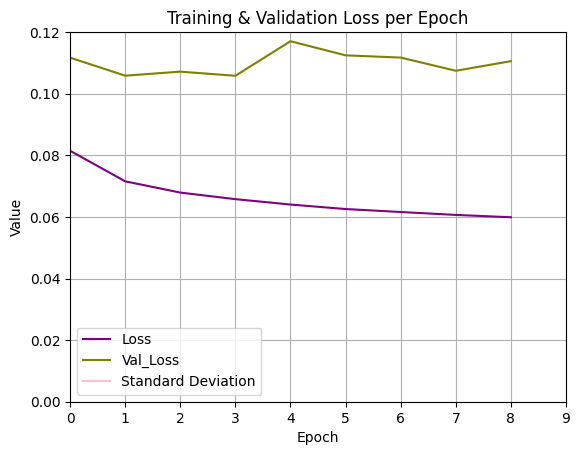

In [117]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history.history['loss'],  color='purple',label='Loss')
plt.plot(history.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.xlim(0,len(history.history['loss']))

plt.title('Training & Validation Loss per Epoch')
plt.legend()

plt.grid(True)
plt.savefig('val_loss_capping_77_0.png',format='png')
# Muestra el gráfico
plt.show()

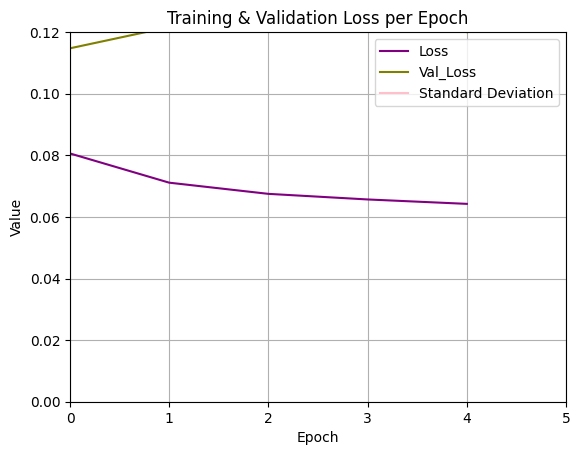

In [118]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history1.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history1.history['loss'],  color='purple',label='Loss')
plt.plot(history1.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.xlim(0,len(history1.history['loss']))

plt.title('Training & Validation Loss per Epoch')
plt.legend()

plt.grid(True)
plt.savefig('val_loss_capping_77_1.png',format='png')
# Muestra el gráfico
plt.show()

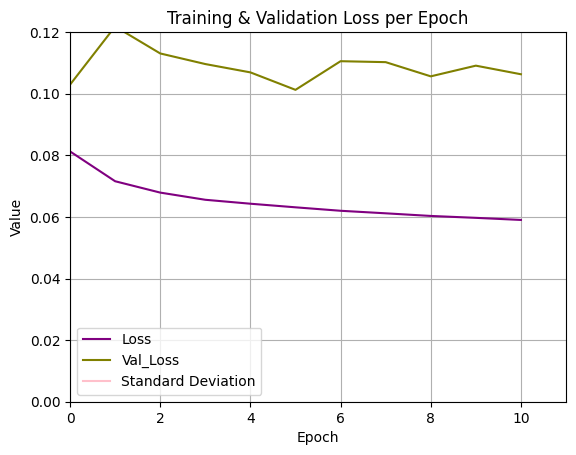

In [119]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history2.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history2.history['loss'],  color='purple',label='Loss')
plt.plot(history2.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.xlim(0,len(history2.history['loss']))

plt.title('Training & Validation Loss per Epoch')
plt.legend()

plt.grid(True)
plt.savefig('val_loss_capping_77_2.png',format='png')
# Muestra el gráfico
plt.show()

In [120]:
predictions=model.predict(X_test)
predictions1=model1.predict(X_test)
predictions2=model2.predict(X_test)

948/948 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
948/948 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
948/948 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [121]:
# Calcular MAE
mae_0 = mean_absolute_error(y_test, predictions)
mse_0= mean_squared_error(y_test, predictions)
# Calcular R-squared
r2_0 = r2_score(y_test, predictions)

smape_0 = smape_f(y_test, predictions)

# Imprimir las métricas
print(f"MAE: {mae_0}")
print(f"MSE: {mse_0}")
print(f"R-squared: {r2_0}")
print(f"SMAPE: {smape_0}%")
#-----------------------------
# Calcular MAE
mae_1 = mean_absolute_error(y_test, predictions1)
mse_1= mean_squared_error(y_test, predictions1)
# Calcular R-squared
r2_1 = r2_score(y_test, predictions1)

smape_1 = smape_f(y_test, predictions1)

# Imprimir las métricas
print(f"MAE: {mae_1}")
print(f"MSE: {mse_1}")
print(f"R-squared: {r2_1}")
print(f"SMAPE: {smape_1}%")
#-----------------------------
# Calcular MAE
mae_2 = mean_absolute_error(y_test, predictions2)
mse_2= mean_squared_error(y_test, predictions2)
# Calcular R-squared
r2_2 = r2_score(y_test, predictions2)

smape_2 = smape_f(y_test, predictions2)

# Imprimir las métricas
print(f"MAE: {mae_2}")
print(f"MSE: {mse_2}")
print(f"R-squared: {r2_2}")
print(f"SMAPE: {smape_2}%")

MAE: 0.0899655893445015
MSE: 0.013842056505382061
R-squared: 0.37396711111068726
SMAPE: 25.28257966041565%
MAE: 0.08720169216394424
MSE: 0.013245700858533382
R-squared: 0.40093839168548584
SMAPE: 24.156856536865234%
MAE: 0.08653399348258972
MSE: 0.012862782925367355
R-squared: 0.41825664043426514
SMAPE: 24.027451872825623%


In [122]:
mae5=np.mean([mae_0,mae_1,mae_2])
mse5=np.mean([mse_0,mse_1,mse_2])
r25=np.mean([r2_0,r2_1,r2_2])
smape5=np.mean([smape_0,smape_1,smape_2])
mae_std_5=np.std([mae_0,mae_1,mae_2])
mse_std_5=np.std([mse_0,mse_1,mse_2])
r2_std_5=np.std([r2_0,r2_1,r2_2])
smape_std_5=np.std([smape_0,smape_1,smape_2])

### Predicción usando 10 días previos para el día siguiente

In [123]:
sequence_length = 10  # Longitud de la secuencia para el LSTM
X, y = [], []

for location, location_df in grouped_data.items():
    # Convertir el DataFrame a una matriz de NumPy, excluyendo 'Date', 'Location' y 'mp10' de X
    features = location_df.drop(['Date', 'station', 'mp10'], axis=1).values
    target = location_df['mp10'].values
    # Crear secuencias y etiquetas para cada locación
    for i in range(sequence_length, len(features)):
        X.append(tf.convert_to_tensor(features[i-sequence_length:i],dtype=tf.float32))  # Secuencia de entrada
        y.append(tf.convert_to_tensor(target[i],dtype=tf.float32))  # 'mp10' como objetivo

# Convertir listas a arrays de NumPy
X, y = np.array(X), np.array(y)


In [124]:
# Normalizar características de entrada
scaler_X = MinMaxScaler()
X_reshaped = X.reshape(-1, X.shape[-1])
X_normalized = scaler_X.fit_transform(X_reshaped)
X = X_normalized.reshape(X.shape)

# Si deseas normalizar `y`, usa otro escalador (opcional)
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

In [125]:
train_size = int(len(X) * 0.7)
validation_size=int(len(X) * 0.1)
X_train,X_val, X_test = X[:train_size],X[train_size:train_size+validation_size], X[train_size+validation_size:]
y_train,y_val, y_test = y[:train_size],y[train_size:train_size+validation_size], y[train_size+validation_size:]


In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])


# Definir el modelo LSTM
model1 = Sequential()
model1.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(LSTM(units=50))
model1.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model1.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])
# Definir el modelo LSTM
model2 = Sequential()
model2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(LSTM(units=50))
model2.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model2.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])


C:\Users\benja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [127]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Métrica a monitorear
    patience=5,         # Número de épocas de paciencia
    restore_best_weights=True  # Restaurar los mejores pesos al final del entrenamiento
)

In [128]:
# Entrenar el modelo
history=model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping])
# Entrenar el modelo
history1=model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping])
# Entrenar el modelo
history2=model2.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping])

Epoch 1/50
6634/6634 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - loss: 0.1140 - mean_absolute_percentage_error: 97332.9375 - mean_squared_error: 0.0259 - val_loss: 0.1234 - val_mean_absolute_percentage_error: 162524.6562 - val_mean_squared_error: 0.0293
Epoch 2/50
6634/6634 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0960 - mean_absolute_percentage_error: 82349.8828 - mean_squared_error: 0.0187 - val_loss: 0.1437 - val_mean_absolute_percentage_error: 153374.3906 - val_mean_squared_error: 0.0386
Epoch 3/50
6634/6634 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0916 - mean_absolute_percentage_error: 77402.2578 - mean_squared_error: 0.0173 - val_loss: 0.1427 - val_mean_absolute_percentage_error: 129864.1875 - val_mean_squared_error: 0.0386
Epoch 4/50
6634/6634 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0884 - mean_absolute_percentage_error: 78385.5625 - mean_squared_error: 0.0164 - val_loss: 0.1529 - val_mean_absolute_percentage_error: 129695.1797 - val_mean_squared_error: 0.0433
Epoch 5/50
6634/

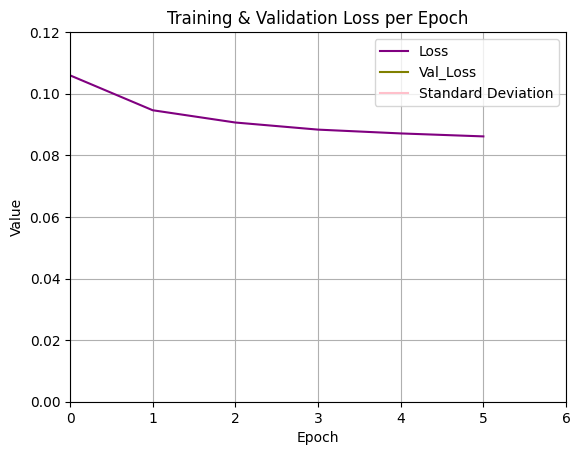

In [129]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history.history['loss'],  color='purple',label='Loss')
plt.plot(history.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.title('Training & Validation Loss per Epoch')
plt.xlim(0,len(history.history['loss']))

plt.legend()

plt.grid(True)
plt.savefig('val_loss_tabular_capping_101_0.png',format='png')
# Muestra el gráfico
plt.show()

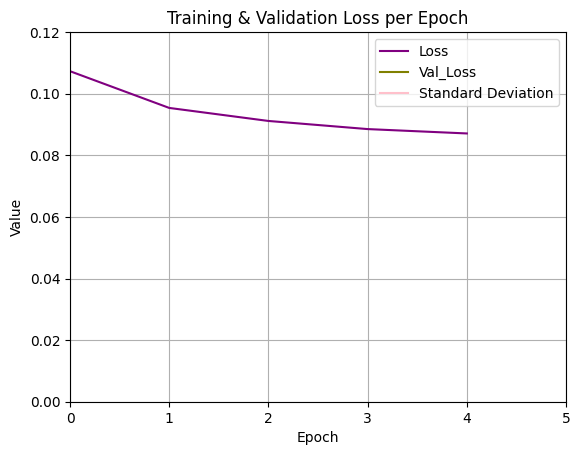

In [130]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history1.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history1.history['loss'],  color='purple',label='Loss')
plt.plot(history1.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.title('Training & Validation Loss per Epoch')
plt.xlim(0,len(history1.history['loss']))

plt.legend()

plt.grid(True)
plt.savefig('val_loss_tabular_capping_101_1.png',format='png')
# Muestra el gráfico
plt.show()

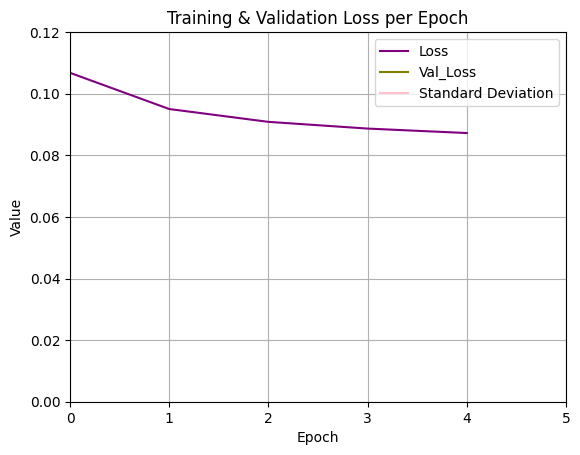

In [131]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history2.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history2.history['loss'],  color='purple',label='Loss')
plt.plot(history2.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.title('Training & Validation Loss per Epoch')
plt.xlim(0,len(history2.history['loss']))

plt.legend()

plt.grid(True)
plt.savefig('val_loss_tabular_capping_101_2.png',format='png')
# Muestra el gráfico
plt.show()

In [132]:
predictions=model.predict(X_test)
predictions1=model1.predict(X_test)
predictions2=model2.predict(X_test)

948/948 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
948/948 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
948/948 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [133]:
# Calcular MAE
mae = mean_absolute_error(y_test, predictions)
mse= mean_squared_error(y_test, predictions)
# Calcular R-squared
r2 = r2_score(y_test, predictions)


smape = smape_f(y_test, predictions)

# Imprimir las métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"SMAPE: {smape}%")

MAE: 0.10865981131792068
MSE: 0.021011285483837128
R-squared: 0.3971710205078125
SMAPE: 30.703717470169067%


In [134]:
# Calcular MAE
mae_1 = mean_absolute_error(y_test, predictions1)
mse_1= mean_squared_error(y_test, predictions1)
# Calcular R-squared
r2_1 = r2_score(y_test, predictions1)


smape_1 = smape_f(y_test, predictions1)

# Imprimir las métricas
print(f"MAE: {mae_1}")
print(f"MSE: {mse_1}")
print(f"R-squared: {r2_1}")
print(f"SMAPE: {smape_1}%")

MAE: 0.11192924529314041
MSE: 0.0231117382645607
R-squared: 0.3369075059890747
SMAPE: 31.671416759490967%


In [135]:
# Calcular MAE
mae_2= mean_absolute_error(y_test, predictions2)
mse_2= mean_squared_error(y_test, predictions2)
# Calcular R-squared
r2_2 = r2_score(y_test, predictions2)


smape_2 = smape_f(y_test, predictions2)

# Imprimir las métricas
print(f"MAE: {mae_2}")
print(f"MSE: {mse_2}")
print(f"R-squared: {r2_2}")
print(f"SMAPE: {smape_2}%")

MAE: 0.10931163281202316
MSE: 0.0215085968375206
R-squared: 0.3829028010368347
SMAPE: 30.988752841949463%


In [136]:
mae6=np.mean([mae,mae1,mae2])
mae_std_6=np.std([mae,mae1,mae2])
mse6=np.mean([mse,mse1,mse2])
mse_std_6=np.std([mse,mse1,mse2])
r26=np.mean([r2,r21,r22])
r2_std_6=np.mean([r2,r21,r22])
smape6=np.mean([smape,smape1,smape2])
smape_std_6=np.mean([smape,smape1,smape2])

### Predicción usando 10 días previos para la semana siguiente

In [137]:
df_Scaled=df.copy()
df_Scaled.fillna(value=0,inplace=True)
grouped_data = {location: location_df.sort_values(by='Date') for location, location_df in df_Scaled.groupby('station')}
sequence_length = 10  # Número de días anteriores a usar
prediction_length = 7  # Número de días a predecir (para el promedio)
X, y = [], []

for location, location_df in grouped_data.items():
    features = location_df.drop(['Date', 'station', 'mp10'], axis=1).values
    target = location_df['mp10'].values
    
    for i in range(sequence_length, len(features) - prediction_length + 1):
        # Crear secuencia de entrada de `sequence_length` días
        X.append(tf.convert_to_tensor(features[i-sequence_length:i],dtype=tf.float32))
        
        # Calcular el promedio de `mp10` para los próximos 7 días
        y.append(tf.convert_to_tensor(np.mean(target[i:i+prediction_length]),dtype=tf.float32))

# Convertir a arrays de numpy
X, y = np.array(X), np.array(y)

print(f"Forma de X: {X.shape}, Forma de y: {y.shape}")


Forma de X: (151453, 10, 17), Forma de y: (151453,)


In [138]:
# Normalizar características de entrada
scaler_X = MinMaxScaler()
X_reshaped = X.reshape(-1, X.shape[-1])
X_normalized = scaler_X.fit_transform(X_reshaped)
X = X_normalized.reshape(X.shape)

# Si deseas normalizar `y`, usa otro escalador (opcional)
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

In [139]:
# Dividir en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
train_size = int(len(X) * 0.7)
validation_size=int(len(X) * 0.1)
X_train,X_val, X_test = X[:train_size],X[train_size:train_size+validation_size], X[train_size+validation_size:]
y_train,y_val, y_test = y[:train_size],y[train_size:train_size+validation_size], y[train_size+validation_size:]


In [140]:

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])

# Definir el modelo LSTM
model1 = Sequential()
model1.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(LSTM(units=50))
model1.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model1.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])


# Definir el modelo LSTM
model2 = Sequential()
model2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(LSTM(units=50))
model2.add(Dense(units=y_train.shape[1]))  # Número de salidas

# Compilar el modelo
model2.compile(optimizer='adam', loss='mean_absolute_error',metrics=['mean_squared_error','mean_absolute_percentage_error'])

# Configurar Early Stopping
early_stopping1 = EarlyStopping(
    monitor='val_loss',  # Métrica a monitorear
    patience=5,         # Número de épocas de paciencia
    restore_best_weights=True  # Restaurar los mejores pesos al final del entrenamiento
)


C:\Users\benja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [141]:
# Entrenar el modelo
history=model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping1])
history1=model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping1])
history2=model2.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val),callbacks=[early_stopping1])

Epoch 1/50
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 0.0872 - mean_absolute_percentage_error: 33.5806 - mean_squared_error: 0.0147 - val_loss: 0.1039 - val_mean_absolute_percentage_error: 40.8619 - val_mean_squared_error: 0.0191
Epoch 2/50
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0725 - mean_absolute_percentage_error: 26.7141 - mean_squared_error: 0.0102 - val_loss: 0.0991 - val_mean_absolute_percentage_error: 40.2730 - val_mean_squared_error: 0.0178
Epoch 3/50
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.0680 - mean_absolute_percentage_error: 24.7314 - mean_squared_error: 0.0091 - val_loss: 0.0980 - val_mean_absolute_percentage_error: 41.2770 - val_mean_squared_error: 0.0175
Epoch 4/50
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.0658 - mean_absolute_percentage_error: 23.8530 - mean_squared_error: 0.0087 - val_loss: 0.1099 - val_mean_absolute_percentage_error: 44.8281 - val_mean_squared_error: 0.0219
Epoch 5/50
6627/6627 ━━━━━━━━━━━━━━━━━━━━ 23

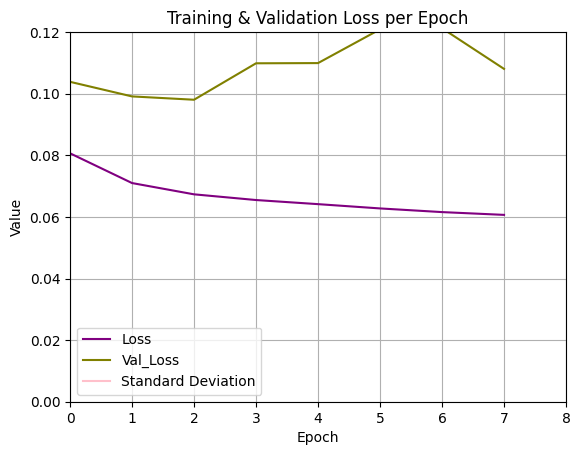

In [142]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history.history['loss'],  color='purple',label='Loss')
plt.plot(history.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.xlim(0,len(history.history['loss']))

plt.title('Training & Validation Loss per Epoch')
plt.legend()

plt.grid(True)
plt.savefig('val_loss_107_0.png',format='png')
# Muestra el gráfico
plt.show()

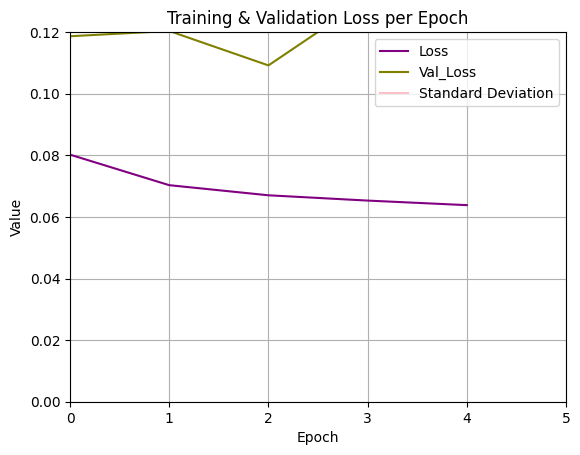

In [143]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history1.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history1.history['loss'],  color='purple',label='Loss')
plt.plot(history1.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.xlim(0,len(history1.history['loss']))

plt.title('Training & Validation Loss per Epoch')
plt.legend()

plt.grid(True)
plt.savefig('val_loss_107_1.png',format='png')
# Muestra el gráfico
plt.show()

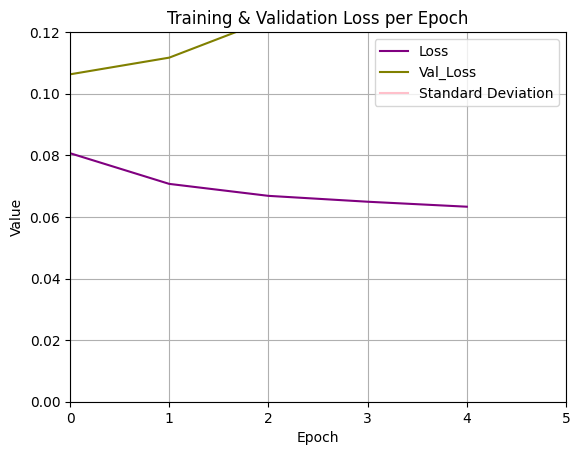

In [144]:
import matplotlib.pyplot as plt
s=[y.std()]*len(history2.history['loss'])
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history2.history['loss'],  color='purple',label='Loss')
plt.plot(history2.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.xlim(0,len(history2.history['loss']))

plt.title('Training & Validation Loss per Epoch')
plt.legend()

plt.grid(True)
plt.savefig('val_loss_107_2.png',format='png')
# Muestra el gráfico
plt.show()

In [145]:
predictions=model.predict(X_test)
predictions1=model1.predict(X_test)
predictions2=model2.predict(X_test)

947/947 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
947/947 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
947/947 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [146]:
# Calcular MAE
mae_0 = mean_absolute_error(y_test, predictions)
mse_0= mean_squared_error(y_test, predictions)
# Calcular R-squared
r2_0 = r2_score(y_test, predictions)

smape_0 = smape_f(y_test, predictions)

# Imprimir las métricas
print(f"MAE: {mae_0}")
print(f"MSE: {mse_0}")
print(f"R-squared: {r2_0}")
print(f"SMAPE: {smape_0}%")
#-----------------------------
# Calcular MAE
mae_1 = mean_absolute_error(y_test, predictions1)
mse_1= mean_squared_error(y_test, predictions1)
# Calcular R-squared
r2_1 = r2_score(y_test, predictions1)

smape_1 = smape_f(y_test, predictions1)

# Imprimir las métricas
print(f"MAE: {mae_1}")
print(f"MSE: {mse_1}")
print(f"R-squared: {r2_1}")
print(f"SMAPE: {smape_1}%")
#-----------------------------
# Calcular MAE
mae_2 = mean_absolute_error(y_test, predictions2)
mse_2= mean_squared_error(y_test, predictions2)
# Calcular R-squared
r2_2 = r2_score(y_test, predictions2)

smape_2 = smape_f(y_test, predictions2)

# Imprimir las métricas
print(f"MAE: {mae_2}")
print(f"MSE: {mse_2}")
print(f"R-squared: {r2_2}")
print(f"SMAPE: {smape_2}%")

MAE: 0.0895155593752861
MSE: 0.01308848150074482
R-squared: 0.40803325176239014
SMAPE: 24.715445935726166%
MAE: 0.08289632946252823
MSE: 0.011727489531040192
R-squared: 0.4695882797241211
SMAPE: 22.932757437229156%
MAE: 0.08947864174842834
MSE: 0.01279067900031805
R-squared: 0.4215022921562195
SMAPE: 24.907614290714264%


In [147]:
mae7=np.mean([mae_0,mae_1,mae_2])
mse7=np.mean([mse_0,mse_1,mse_2])
r27=np.mean([r2_0,r2_1,r2_2])
smape7=np.mean([smape_0,smape_1,smape_2])
mae_std_7=np.std([mae_0,mae_1,mae_2])
mse_std_7=np.std([mse_0,mse_1,mse_2])
r2_std_7=np.std([r2_0,r2_1,r2_2])
smape_std_7=np.std([smape_0,smape_1,smape_2])

In [149]:
mae_list = [mae, mae1, mae2, mae3, mae4, mae5, mae6, mae7]
mse_list = [mse, mse1, mse2, mse3, mse4, mse5, mse6, mse7]
r2_list = [r2, r21, r22, r23, r24, r25, r26, r27]
smape_list = [smape, smape1, smape2, smape3, smape4, smape5, smape6, smape7]
mae_std_list = [mae_std_0, mae_std_1, mae_std_2, mae_std_3, mae_std_4, mae_std_5, mae_std_6, mae_std_7]
mse_std_list = [mse_std_0, mse_std_1, mse_std_2, mse_std_3, mse_std_4, mse_std_5, mse_std_6, mse_std_7]
r2_std_list = [r2_std_0, r2_std_1, r2_std_2, r2_std_3, r2_std_4, r2_std_5, r2_std_6, r2_std_7]
smape_std_list = [smape_std_0, smape_std_1, smape_std_2, smape_std_3, smape_std_4, smape_std_5, smape_std_6, smape_std_7]
# Crear una lista de modelos del 0 al 7
modelos = list(range(8))

# Crear un diccionario con los datos
data = {
    'Modelo': modelos,
    'MAE': mae_list,
    'MAE_std':mae_std_list,
    'MSE': mse_list,
    'MSE_std':mse_std_list,
    'R2': r2_list,
    'R2_std':r2_std_list,
    'SMAPE': smape_list,
    'SMAPE_std': smape_std_list
}

# Crear un DataFrame de pandas con los datos
dfs = pd.DataFrame(data)

# Mostrar el DataFrame
print(dfs)


   Modelo       MAE   MAE_std       MSE   MSE_std        R2    R2_std  \
0       0  0.108660  0.000384  0.021011  0.000036  0.397171  0.028304   
1       1  0.018427  0.000150  0.000658  0.000007  0.412032  0.006259   
2       2  0.018640  0.000088  0.000717  0.000032  0.414446  0.418101   
3       3  0.018931  0.000197  0.000688  0.000025  0.384961  0.022082   
4       4  0.108564  0.002870  0.020887  0.001064  0.401031  0.030515   
5       5  0.087900  0.001486  0.013317  0.000403  0.397721  0.018224   
6       6  0.048576  0.042486  0.007462  0.009581  0.407883  0.407883   
7       7  0.087297  0.003112  0.012536  0.000584  0.433041  0.026421   

       SMAPE  SMAPE_std  
0  30.703717   0.777032  
1  24.433964   0.259140  
2  28.090237  27.360628  
3  25.080911   0.261107  
4  30.815330   0.658249  
5  24.488963   0.563653  
6  27.742640  27.742640  
7  24.185273   0.889130  


In [160]:
# Filtrar los modelos que no son 4, 5, 6, 7
modelos_a_transformar_y = dfs[~dfs['Modelo'].isin([4, 5, 6, 7])]

# Filtrar los modelos 4, 5, 6, 7
modelos_a_transformar_y2 = dfs[dfs['Modelo'].isin([4, 5, 6, 7])]

# Seleccionar columnas que serán transformadas (excluir SMAPE_mean y SMAPE_std)
columnas_a_transformar = ['MAE', 'MAE_std', 'MSE', 'MSE_std']

# Aplicar la transformación inversa con scaler_y a los modelos que no son 4 al 7
modelos_a_transformar_y[columnas_a_transformar] = scaler_y.inverse_transform(modelos_a_transformar_y[columnas_a_transformar])

# Aplicar la transformación inversa con scaler_y2 a los modelos 4, 5, 6, 7
modelos_a_transformar_y2[columnas_a_transformar] = scaler_y_2.inverse_transform(modelos_a_transformar_y2[columnas_a_transformar])

# Combinar ambos conjuntos de datos
resultados_finales = pd.concat([modelos_a_transformar_y, modelos_a_transformar_y2])

# Ordenar por Modelo para mantener el orden original
resultados_finales = resultados_finales.sort_values(by='Modelo').reset_index(drop=True)

# Mostrar los resultados finales
print(resultados_finales)


   Modelo        MAE   MAE_std       MSE   MSE_std        R2    R2_std  \
0       0  17.267753  0.060997  3.339024  0.005746  0.397171  0.028304   
1       1   2.928303  0.023796  0.104493  0.001112  0.412032  0.006259   
2       2   2.962211  0.014034  0.113893  0.005030  0.414446  0.418101   
3       3   3.008428  0.031348  0.109312  0.003925  0.384961  0.022082   
4       4  16.198438  0.428264  3.116527  0.158772  0.401031  0.030515   
5       5  13.115303  0.221648  1.986959  0.060121  0.397721  0.018224   
6       6   7.247785  6.339192  1.113354  1.429537  0.407883  0.407883   
7       7  13.025246  0.464281  1.870384  0.087163  0.433041  0.026421   

       SMAPE  SMAPE_std  
0  30.703717   0.777032  
1  24.433964   0.259140  
2  28.090237  27.360628  
3  25.080911   0.261107  
4  30.815330   0.658249  
5  24.488963   0.563653  
6  27.742640  27.742640  
7  24.185273   0.889130  


C:\Users\benja\AppData\Local\Temp\ipykernel_17068\4121184482.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelos_a_transformar_y[columnas_a_transformar] = scaler_y.inverse_transform(modelos_a_transformar_y[columnas_a_transformar])
C:\Users\benja\AppData\Local\Temp\ipykernel_17068\4121184482.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelos_a_transformar_y2[columnas_a_transformar] = scaler_y_2.inverse_transform(modelos_a_transformar_y2[columnas_a_transformar])
